In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [192]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書
    n_sumple = X.shape[0]
    n_train = np.floor(0.8*n_sumple).astype(int)
    n_test =n_sumple - n_train
    X_train = X[:n_train]
    X_test = X[n_train:]

    n_sumple = y.shape[0]
    n_train = np.floor(0.8*n_sumple).astype(int)
    n_test =n_sumple - n_train
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    
    return X_train, X_test, y_train, y_test

In [193]:
X, y = np.arange(20).reshape((10, 2)), np.arange(10)

In [194]:
# 作成した関数のテスト
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y)

In [195]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]]
[[16 17]
 [18 19]]
[0 1 2 3 4 5 6 7]
[8 9]


In [196]:
# sklearn　のtrain_test_split関数
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[12 13]
 [ 8  9]
 [ 0  1]
 [ 6  7]
 [ 2  3]
 [14 15]
 [16 17]
 [10 11]]
[[ 4  5]
 [18 19]]
[6 4 0 3 1 7 8 5]
[2 9]


# 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

ValueError: setting an array element with a sequence.

３種類のデータセットの準備

## Iris_datasetを使った分類３手法の機械学習

In [79]:
# iris_dataset
from sklearn.datasets import load_iris

iris_dataset = load_iris()
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = pd.DataFrame(iris_dataset.data)
X.columns = feature
y = pd.DataFrame(iris_dataset.target)
y.columns = ['Species']

In [80]:
df = pd.concat([X, y], axis=1, sort=True)

In [81]:
df_selected = df.query("Species == [1, 2]")

In [82]:
from sklearn.model_selection import train_test_split

# シード値は random_state（データを分割する際の乱数のシード値）で指定できます。
X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "Species"], test_size=0.25, random_state=42)

print("X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))

X_train.shape : (75, 4), X_test.shape : (25, 4)


### ロジスティック回帰

In [85]:
# 学習
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
# 予測
y_pred = sgd.predict(X_test)

In [91]:
from sklearn import metrics
#評価用の関数
def evaluate(y_test, y_pred):    
    # 正解率
    print('正解率:',metrics.accuracy_score(y_test, y_pred ))
    # 適合率
    print("適合率:", metrics.precision_score(y_test, y_pred))
    #再現率
    print('再現率:', metrics.recall_score(y_test, y_pred))
    # F値
    print('F値:', metrics.f1_score(y_test, y_pred))

evaluate(y_test, y_pred)

正解率: 0.88
適合率: 1.0
再現率: 0.7857142857142857
F値: 0.88


### SVM

In [93]:
# 学習
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [104]:
# 予測
y_pred = svm.predict(X_test)

In [105]:
# 評価
evaluate(y_test, y_pred)

正解率: 0.92
適合率: 1.0
再現率: 0.8571428571428571
F値: 0.923076923076923


### 決定木

In [106]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
# 予測
y_pred = tree.predict(X_test)

In [110]:
# 評価
evaluate(y_test, y_pred)

正解率: 0.8
適合率: 0.7647058823529411
再現率: 0.9285714285714286
F値: 0.8387096774193549


## Simple1_datasetを使った３手法の機械学習

In [119]:
#シンプルデータセット１
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X_simple1 = np.concatenate((f0, f1))
y_simple1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X_s1 = X_simple1[random_index]
y_s1 = y_simple1[random_index]

In [120]:
X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(X_s1, y_s1, test_size=0.25, random_state=42)

print("X_train.shape : {}, X_test.shape : {}".format(X_s1_train.shape, X_s1_test.shape))

X_train.shape : (375, 2), X_test.shape : (125, 2)


### ロジスティック回帰

In [121]:
# 学習
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
sgd.fit(X_s1_train, y_s1_train)

# 予測
y_pred = sgd.predict(X_s1_test)

# 評価
evaluate(y_s1_test, y_pred)

正解率: 1.0
適合率: 1.0
再現率: 1.0
F値: 1.0


### SVM

In [122]:
# 学習
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_s1_train, y_s1_train)

# 予測
y_pred = svm.predict(X_s1_test)

# 評価
evaluate(y_s1_test, y_pred)

正解率: 1.0
適合率: 1.0
再現率: 1.0
F値: 1.0


### 決定木

In [123]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_s1_train, y_s1_train)

# 予測
y_pred = tree.predict(X_s1_test)

# 評価
evaluate(y_s1_test, y_pred)

正解率: 1.0
適合率: 1.0
再現率: 1.0
F値: 1.0


## Simple2_datasetを使った３手法の機械学習

In [126]:
# sample2_dataset
X_s2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_s2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [127]:
X_s2_train, X_s2_test, y_s2_train, y_s2_test = train_test_split(X_s2, y_s2, test_size=0.25, random_state=42)

print("X_train.shape : {}, X_test.shape : {}".format(X_s2_train.shape, X_s2_test.shape))

X_train.shape : (30, 2), X_test.shape : (10, 2)


### ロジスティック回帰

In [130]:
# 学習
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
sgd.fit(X_s2_train, y_s2_train)

# 予測
y_pred = sgd.predict(X_s2_test)

# 評価
evaluate(y_s2_test, y_pred)

正解率: 0.4
適合率: 0.3333333333333333
再現率: 0.5
F値: 0.4


### SVM

In [132]:
# 学習
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_s2_train, y_s2_train)

# 予測
y_pred = svm.predict(X_s2_test)

# 評価
evaluate(y_s2_test, y_pred)

正解率: 0.6
適合率: 0.5
再現率: 0.5
F値: 0.5


### 決定木

In [134]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_s2_train, y_s2_train)

# 予測
y_pred = tree.predict(X_s2_test)

# 評価
evaluate(y_s2_test, y_pred)

正解率: 0.3
適合率: 0.2
再現率: 0.25
F値: 0.22222222222222224


In [138]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==(target)][:, 1], s=80, color=scatter_color[i], label=0, marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=1) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

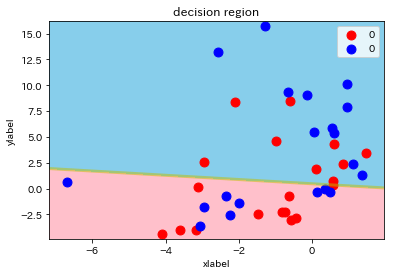

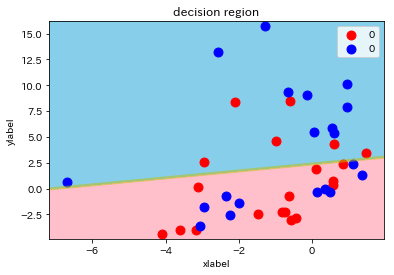

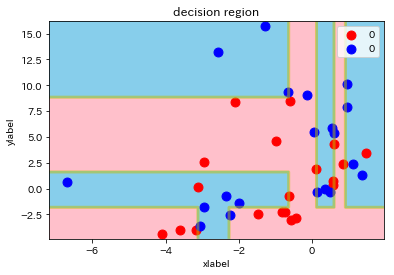

In [143]:
decision_region(X_s2, y_s2, sgd)
decision_region(X_s2, y_s2, svm)
decision_region(X_s2, y_s2, tree)

# 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [163]:
# Datasetの作成
df = pd.read_csv("train.csv")
df_selected = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [165]:
X = df_selected.loc[:, ["GrLivArea", "YearBuilt"]]
y = df_selected['SalePrice']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
from sklearn.linear_model import SGDRegressor

In [169]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [176]:
y_pred = sgd_reg.predict(X_test)
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[-1.15089198e+09]
[-6.49487374e+11 -6.15409251e+11]


In [177]:
from sklearn.metrics import mean_squared_error
# 平均二乗誤差（標準偏差、ばらつき、MSE）を求める
print("MSE : {}".format(mean_squared_error(y_test, y_pred)))

MSE : 4.9685539488257117e+30
